# Step 9: 2D Laplace Equation

Here is the Laplace equation in 2D:

$$
\frac{\partial^2p}{\partial x^2} + \frac{\partial^2p}{\partial y^2} = 0
$$

We know how to discretize a 2nd order derivative. But think about this for a minute: Laplace's equation has the features typical of diffusion phenomena. For this reason, it has to be discretized with *central differences*, so that the discretization is consistent with the physics we want to simulate.

The discretized equation is:

$$
\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0
$$

Notice that the Laplace Equation does not have a time dependence, i.e. there is no $p^{n+1}. Instead of tracking a wave through time (like in the previous steps), the laplace equation calculates the equilibrium state of a system under the supplied boundary conditions.

If you have taken a coursework in Heat Transfer, you will recognize the Laplace Equation as the steady-state heat equation.

Instead of calculating where the system will be at some time $t$, we will iteratively solve for $p_{ij}^n$ until it meets a condition that we specify. The system will reach equilibrium only as the number of iterations tends to $\infty$, but we can approximate the equilibrium state by iterating until the change between one iteration and the next is *very* small.

Rearranging the discretized equation to solve for $p_{ij}^n$.

$$
p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}
$$

Using second-oder central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the **five-point difference operator**, alluding to its stencil.

We are going to solve Laplace's equation numerically by assuming an initial state of $p = 0$ everywhere. Then we add a boundary conditions as follows:

$$
p = 0 \text{ at } x = 0
$$

$$
p = y \text{ at } x = 2
$$

$$
\frac{\partial p}{\partial y} = 0 \text{ at } y = 0, 1
$$

Under these conditions, there is an analytical solution for Laplace's equation:

$$
p(x,y) = \frac{x}{4} - 4 \sum_{n=1, odd}^{\infty} \frac{1}{(n\pi)^2\sinh2n\pi}\sinh n\pi x \cos n\pi y
$$



## Analysis

In [23]:
# -------
# Imports
# -------

import numpy as np
import sympy as sp
from sympy import init_printing
init_printing(use_latex = True)

from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Analysis Function

In [24]:
def laplace2dSolver(p, y, dx, dy, threshold):
    e = float('inf')
    pn = np.empty_like(p)
    
    while e > threshold:
        #     for i in range(1, nx - 1):
        #         for j in range(1, ny - 1):
        #             p[j][i] = (dy**2 * (pn[j][i+1] + pn[j][i-1]) \
        #                        + dx**2 * (pn[j+1][i] + pn[j-1][i])) \
        #                         / (2 * (dx**2 + dy**2))
        pn = np.copy(p)
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
        
        p[:, 0]  = 0         # p = 0 @ x = 0
        p[:, -1] = y         # p = y @ x = 2
        p[0, :]  = p[1, :]   # dp/dy = 0 @ y = 0
        p[-1, :]  = p[-2, :] # dp/dy = 0 @ y = 1
        
        e = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))

    return p

### Ploting Function

In [25]:
def plot2d(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

### Variable Definition

In [33]:
# ---------
# Variables
# ---------

nx = 61
ny = 61
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

threshold = 0.001

# ----------
# Init. Cond
# ----------

p = np.zeros((ny, nx))
pn = np.copy(p)

# -----------
# Bound. Cond
# -----------

p[:, 0]  = 0         # p = 0 @ x = 0
p[:, -1] = y         # p = y @ x = 2
p[0, :]  = p[1, :]   # dp/dy = 0 @ y = 0
p[-1, :]  = p[-2, :] # dp/dy = 0 @ y = 1

### Initial State Visualization

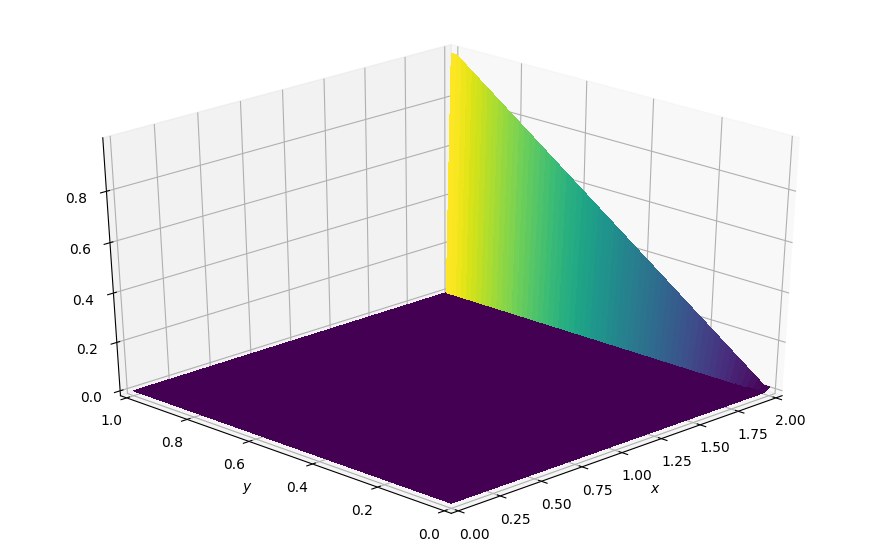

In [34]:
plot2d(x, y, p)

This is the initial state of the problem, where the value of `p` is zero everywhere except for along $x = 2$ where $p = y$. Now let's run the `laplace2dsolver` function with a specified threshold of $1e-4$

### Results

In [35]:
p = laplace2dSolver(p, y, dx, dy, threshold)

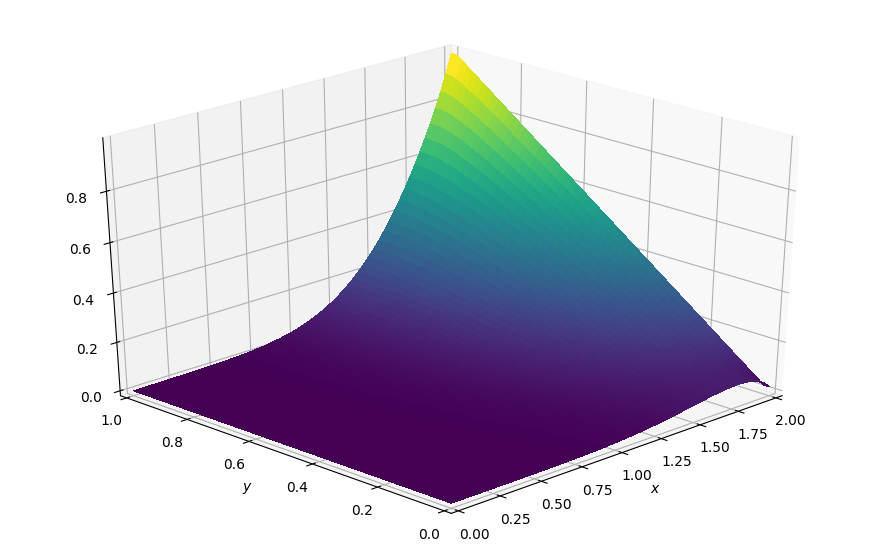

In [36]:
plot2d(x, y, p)